# Sujet 7 : Autour du SARS-CoV-2

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math

Les données du nombres de cas de Covid-19 sont compilés par le ![Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://systems.jhu.edu/) et sont disponibles sur GitHub. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à un pays et s'il est composé de plusieurs provinces ou territoires, chaque territoires est sur une ligne distincte. Les colonnes correspondent aux nombres de cas cumulés chaque jour de Covid-19 à partir du 22 janvier 2020.

In [2]:
data_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
raw_data = pd.read_csv(data_url, skiprows=0)

Nous nous proposons de traiter les cas des pays suivant :
    - Belgique
    - Allemagne
    - Iran
    - Italie
    - Japon
    - Corée du Sud
    - Portugal
    - US
    - Chine (à l'exeption de Hong Kong)
    - France (à l'exeption des territoires et départements d'outre-mer)
    - Royaume Unis (à l'exception des colonies)
    - Pays-Bas (à l'exception des colonies)

Pour plus de simplicité pour le traitement de ces données, nous isolons dans des dataframes les nombres de cas pour chaque pays.
Ainsi nous avons 12 dataframes avec en première ligne le nom du pays et les autres sont composées de la date et du nombre de cas cumulés.

In [3]:
Belgium = raw_data[raw_data['Country/Region'].str.match('Belgium')]
Germany = raw_data[raw_data['Country/Region'].str.match('Germany')]
Iran = raw_data[raw_data['Country/Region'].str.match('Iran')]
Italy = raw_data[raw_data['Country/Region'].str.match('Italy')]
Japan = raw_data[raw_data['Country/Region'].str.match('Japan')]
Korea = raw_data[raw_data['Country/Region'].str.match('Korea, South')]
Portugal = raw_data[raw_data['Country/Region'].str.match('Portugal')]
Spain = raw_data[raw_data['Country/Region'].str.match('Spain')]
US = raw_data[raw_data['Country/Region'].str.match('US')]

temp = raw_data[raw_data['Country/Region'].str.match('China')]
China = temp.drop(index=temp[temp['Province/State'].str.match('Hong Kong')].index[0])

temp = raw_data[raw_data['Country/Region'].str.match('France')]
France = temp[temp.isnull().any(axis=1)]

temp = raw_data[raw_data['Country/Region'].str.match('United Kingdom')]
UK = temp[temp.isnull().any(axis=1)]

temp = raw_data[raw_data['Country/Region'].str.match('Netherlands')]
Netherlands = temp[temp.isnull().any(axis=1)]

Premièrement nous récupérons la liste de toutes les dates grâce à la transposé d'une dataframe. Ensuite nous transformons les dates du format "mm/jj/aa" au format "jj-mm-aa" pour plus de simplicité. 

Dans un second temps nous arrangeons les données en transposant et en supprimant les lignes inutiles comme le nom des provinces/états, la lattitude et longitude. Et nous changeons l'index pour que ce soit maintenant les dates.

In [4]:
def conv_date(ind):
    d=['Country/Region']
    for i in ind[4:]:
        a = re.split('/',i)
        d.append(a[1]+'-'+a[0]+'-'+a[2])
    return d

date = conv_date(US.transpose().index)

def arrangement(df,rename):
    df=df.transpose()
    # df=df.drop(index='Country/Region')
    df=df.drop(index='Province/State')
    df=df.drop(index='Long')
    df=df.drop(index='Lat')
    df['date']=date
    df1 = df.set_index('date')
    if rename:
        df1 = df1.rename(columns={list(df1)[0]:"cumul"})
    return df1

Nous arrongeons ici les données en modifiant le nom du pays pour y rajouter "en" ou "au" pour l'automatisation des plots par la suite.

In [5]:
Belgium = arrangement(Belgium,True);Belgium['cumul'][0]='en Belgique'
Germany = arrangement(Germany,True);Germany['cumul'][0]='en Allemagne'
Iran = arrangement(Iran,True);Iran['cumul'][0]='en Iran'
Italy = arrangement(Italy,True);Italy['cumul'][0]='en Italie'
Japan = arrangement(Japan,True);Japan['cumul'][0]='au Japon'
Korea = arrangement(Korea,True);Korea['cumul'][0]='en Corée du Sud'
Portugal = arrangement(Portugal,True);Portugal['cumul'][0]='au Portugal'
Spain = arrangement(Spain,True);Spain['cumul'][0]='en Espagne'
US = arrangement(US,True);US['cumul'][0]='aux Etats-Unis'
China = arrangement(China,False)
China['cumul']=China.sum(axis=1);China['cumul'][0]='Chine'
France = arrangement(France,True);France['cumul'][0]='en France'
UK =arrangement(UK,True);UK['cumul'][0]='au Royaume Unis'
Netherlands = arrangement(Netherlands,True);Netherlands['cumul'][0]='aux Pays-Bas'

liste = [Belgium,Germany,Iran,Italy,Japan,Korea,Portugal,Spain,US,China,France,UK,Netherlands]

Maintenant que nous avons les données arrangées à notre convenance, nous traçons, pour chaque pays, 2 graphes. Le premier a en abscisse la date et en ordonnée le nombre de cas cumulés de Covid en échelle linéaire. Le second a en abscisse la date et en ordonnée le nombre de cas cumulés de Covid en échelle logarithmique.

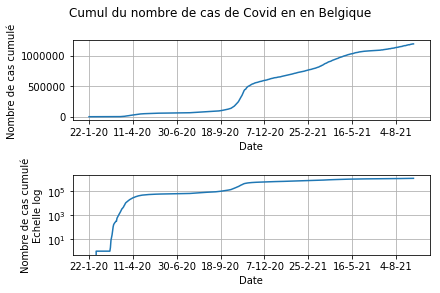

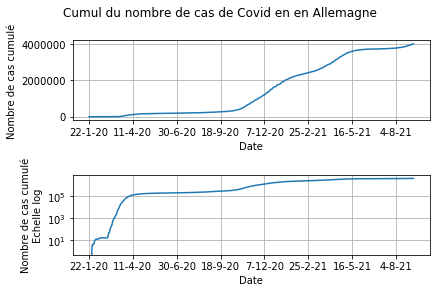

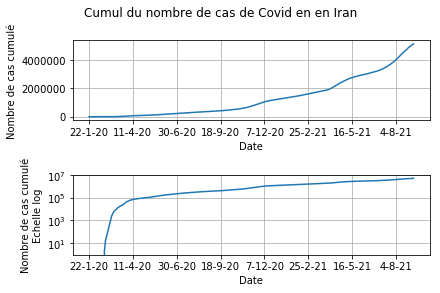

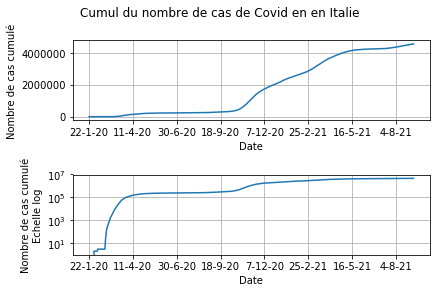

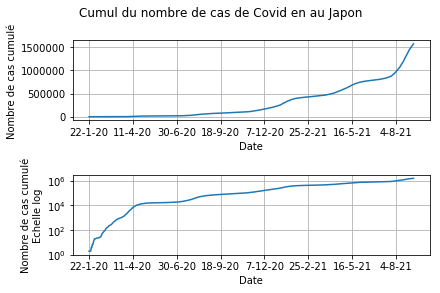

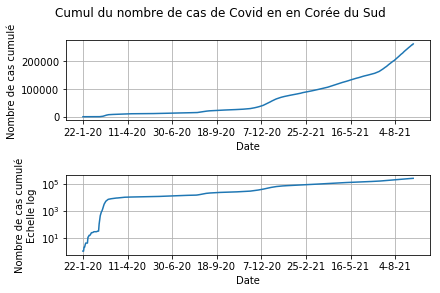

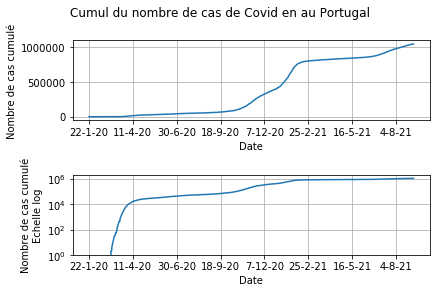

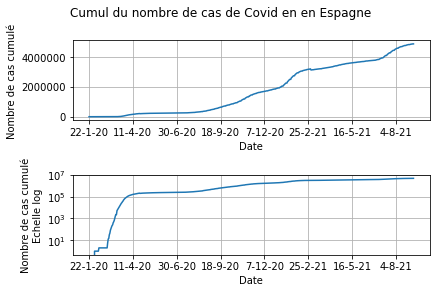

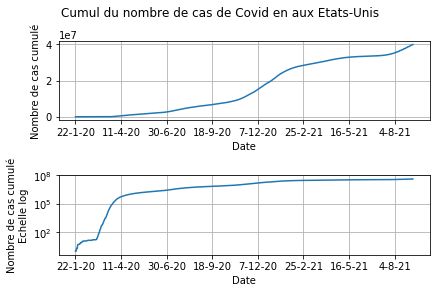

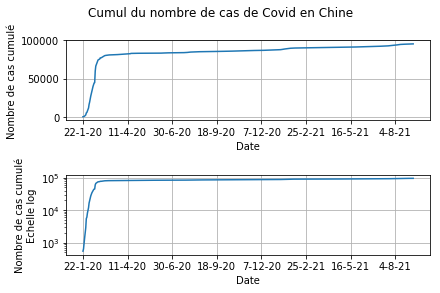

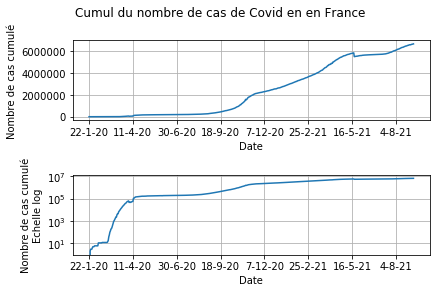

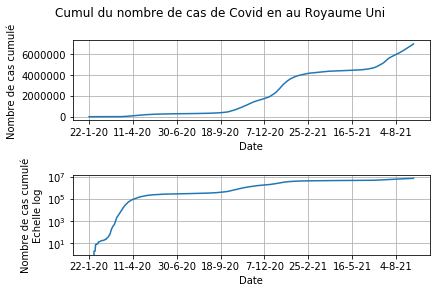

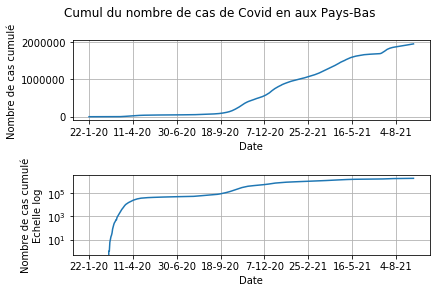

In [6]:
for i in liste:
    fig,axs=plt.subplots(2,1,constrained_layout=True)
    fig.suptitle('Cumul du nombre de cas de Covid en '+i['cumul'][0])
    axs[0].plot(i.index[1:],i['cumul'][1:])
    axs[0].grid(True)
    axs[0].set_xlabel('Date')
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(10))
    axs[0].set_ylabel('Nombre de cas cumulé')
    
    axs[1].plot(i.index[1:],i['cumul'][1:])
    axs[1].grid(True)
    axs[1].set_yscale('log')
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(10))
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Nombre de cas cumulé\nEchelle log')